In [1]:
# MODEL SELECTION (bayes) vs. MODEL FITTING (freq)

In [1]:
from IPython.display import Image

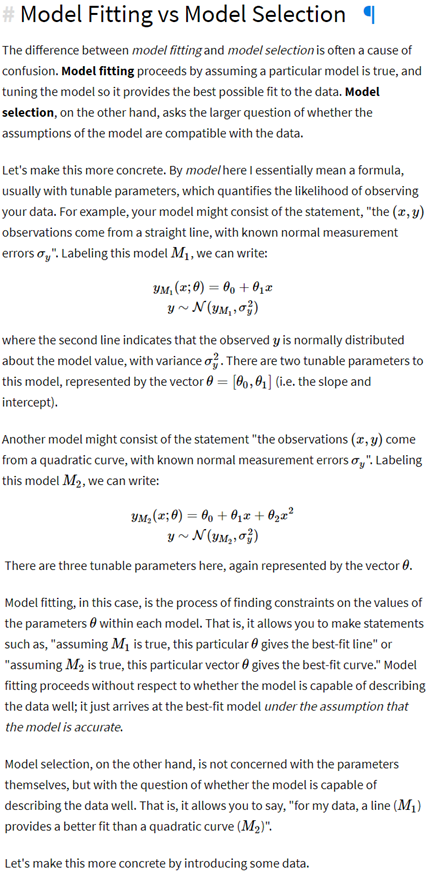

In [2]:
Image(filename="images/5_modelfitvsmodelselect.png")

In [3]:
# PROBLEM TO SOLVE: (model selection): quadratic or linear for this
# data? 


In [5]:
import numpy as np
data = np.array([[ 0.42,  0.72,  0.  ,  0.3 ,  0.15,
                   0.09,  0.19,  0.35,  0.4 ,  0.54,
                   0.42,  0.69,  0.2 ,  0.88,  0.03,
                   0.67,  0.42,  0.56,  0.14,  0.2  ],
                 [ 0.33,  0.41, -0.22,  0.01, -0.05,
                   -0.05, -0.12,  0.26,  0.29,  0.39,
                   0.31,  0.42, -0.01,  0.58, -0.2 ,
                   0.52,  0.15,  0.32, -0.13, -0.09 ],
                 [ 0.1 ,  0.1 ,  0.1 ,  0.1 ,  0.1 ,
                   0.1 ,  0.1 ,  0.1 ,  0.1 ,  0.1 ,
                   0.1 ,  0.1 ,  0.1 ,  0.1 ,  0.1 ,
                   0.1 ,  0.1 ,  0.1 ,  0.1 ,  0.1  ]])
x, y, sigma_y = data

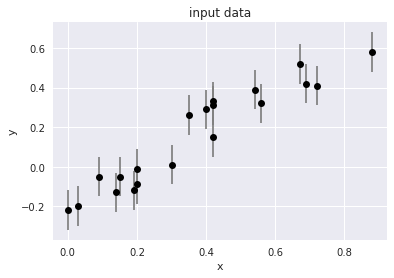

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() # set default plot styles

x, y, sigma_y = data
fig, ax = plt.subplots()
ax.errorbar(x, y, sigma_y, fmt='ok', ecolor='gray')
ax.set(xlabel='x', ylabel='y', title='input data');

In [6]:

# If the theta variable is of length 2, this corresponds to the 
# linear model (M1M1). If the theta variable is length 3, this 
# corresponds to the quadratic model (M2M2).

def polynomial_fit(theta, x):
    """Polynomial model of degree (len(theta) - 1)"""
    return sum(t * x ** n for (n, t) in enumerate(theta))

In [7]:
# As detailed in the previous posts, both the frequentist and 
# Bayesian approaches to model fitting often revolve around 
# the likelihood, which, for independent errors, is the product 
# of the probabilities for each individual point. Here is a function 
# which computes the log-likelihood for the two models:

from scipy import stats

def logL(theta, model=polynomial_fit, data=data):
    """Gaussian log-likelihood of the model at theta"""
    x, y, sigma_y = data
    y_fit = model(theta, x)
    return sum(stats.norm.logpdf(*args)
               for args in zip(y, y_fit, sigma_y))

In [8]:
# need to maximize the log likelihood:

from scipy import optimize

def best_theta(degree, model=polynomial_fit, data=data):
    theta_0 = (degree + 1) * [0]
    neg_logL = lambda theta: -logL(theta, model, data)
    return optimize.fmin_bfgs(neg_logL, theta_0, disp=False)

theta1 = best_theta(1)
theta2 = best_theta(2)

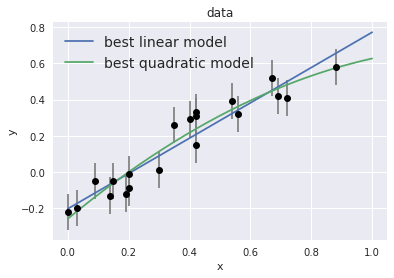

In [9]:
# Let's now we can visually compare the maximum-likelihood 
# degree-1 and degree-2 models:

xfit = np.linspace(0, 1, 1000)
fig, ax = plt.subplots()
ax.errorbar(x, y, sigma_y, fmt='ok', ecolor='gray')
ax.plot(xfit, polynomial_fit(theta1, xfit), label='best linear model')
ax.plot(xfit, polynomial_fit(theta2, xfit), label='best quadratic model')
ax.legend(loc='best', fontsize=14)
ax.set(xlabel='x', ylabel='y', title='data');

In [10]:
# One common mistake is to assume that we can select between 
# models via the value of the maximum likelihood. While this 
# works in some special cases, it is not generally applicable. 
# Let's take a look at 
# the maximum log-likelihood value for each of our fits:

print("linear model:    logL =", logL(best_theta(1)))
print("quadratic model: logL =", logL(best_theta(2)))

# The quadratic model yields a higher log-likelihood, but this 
# does not necessarily mean it is the better model!

# The problem is that the quadratic model has more degrees of 
# freedom than the linear model, and thus will always give
#  an equal or larger maximum likelihood, regardless of the 
# data! This trend holds generally: as you increase model 
# complexity, the maximum likelihood value will (almost) 
# always increase!

linear model:    logL = 22.0108670066
quadratic model: logL = 22.9415135865


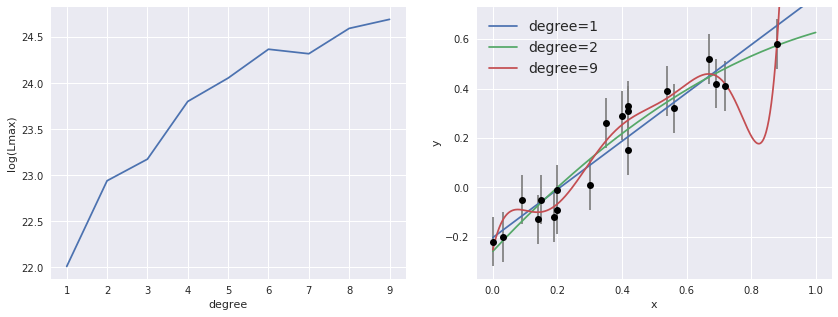

In [13]:
# Let's take a look at the best maximum likelihood for a 
# series of polynomial fits (linear, quadratic, cubic, quartic, etc.):

degrees = np.arange(1, 10)
thetas = [best_theta(d) for d in degrees]
logL_max = [logL(theta) for theta in thetas]

fig, ax = plt.subplots(1, 2, figsize=(14, 5))
ax[0].plot(degrees, logL_max)
ax[0].set(xlabel='degree', ylabel='log(Lmax)')
ax[1].errorbar(x, y, sigma_y, fmt='ok', ecolor='gray')
ylim = ax[1].get_ylim()
for (degree, theta) in zip(degrees, thetas):
    if degree not in [1, 2, 9]: continue
    ax[1].plot(xfit, polynomial_fit(theta, xfit),
               label='degree={0}'.format(degree))
ax[1].set(ylim=ylim, xlabel='x', ylabel='y')
ax[1].legend(fontsize=14, loc='best');

# We see in the left panel that the maximum likelihood value always 
# increases as we increase the degree of the polynomial. Looking at
#  the right panel, we see how this metric has led us astray: while 
# the ninth order polynomial certainly leads to a larger 
# likelihood, it achieves this by over-fitting the data.

# Thus, in some ways, you can view the model selection question 
# as fundamentally about comparing models while 
# correcting for over-fitting of more complicated models. Let's 
# see how this is done within the frequentist and Bayesian 
# approaches.

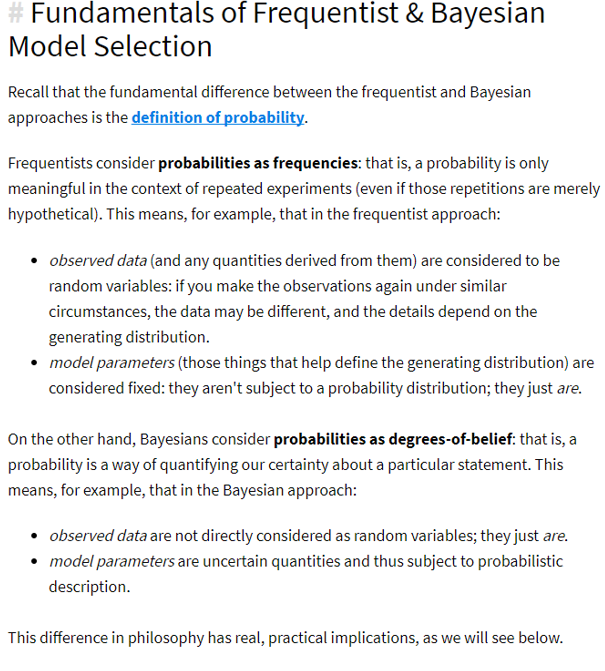

In [14]:
Image(filename="images/5_diff.png")

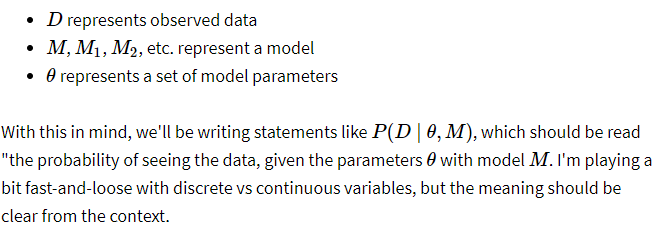

In [15]:
Image(filename="images/5_1.png")

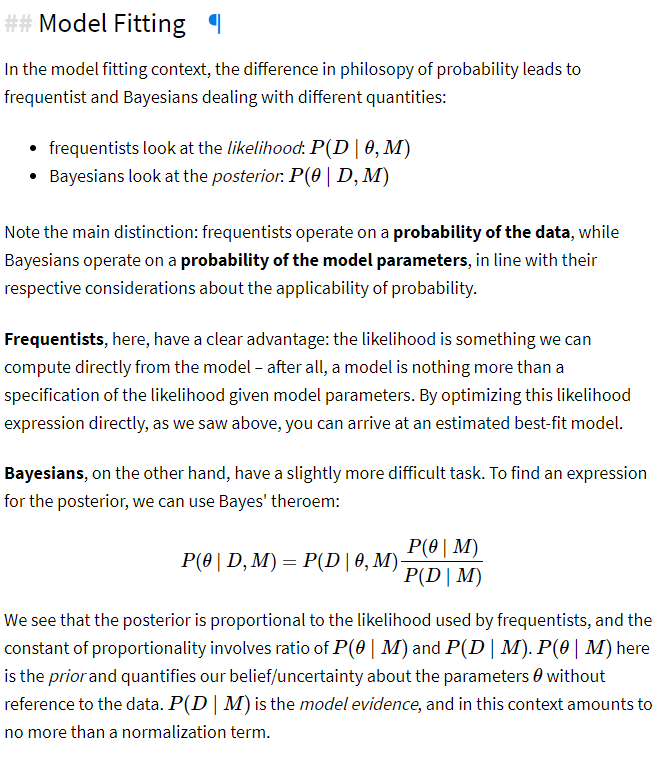

In [16]:
Image(filename="images/5_modelfit.png")

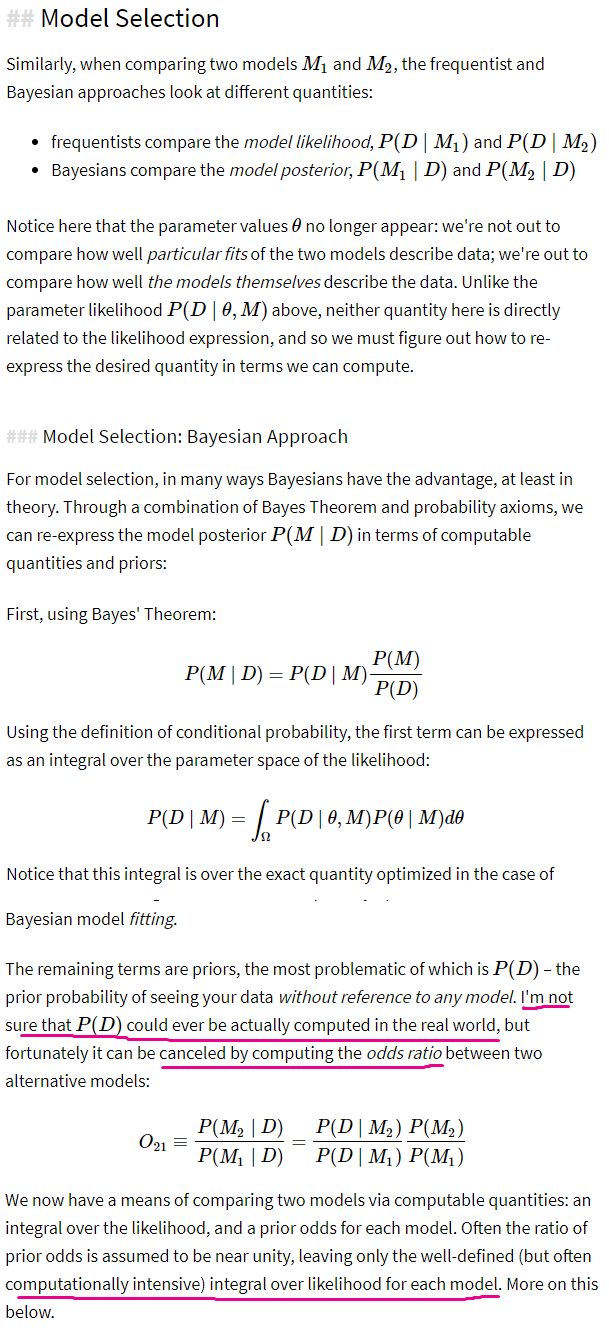

In [17]:
Image(filename="images/5_bayessel.png")

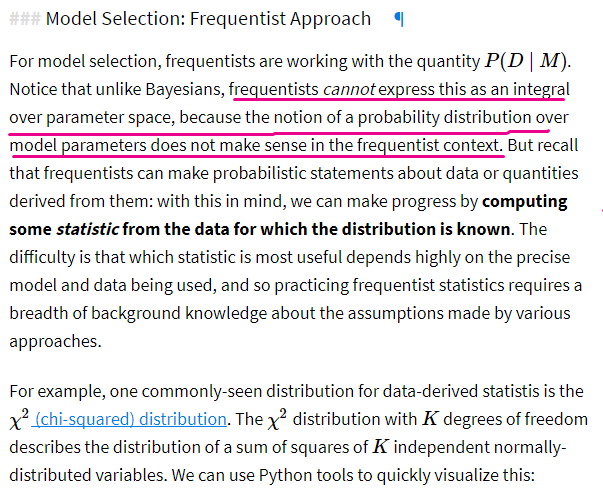

In [18]:
Image(filename="images/5_freqsel.png")

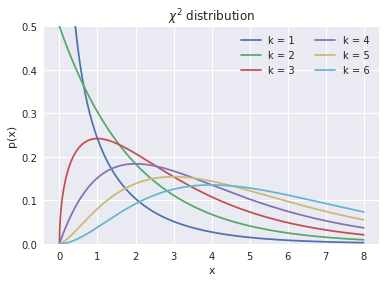

In [19]:
from scipy import stats
v = np.linspace(0, 8, 1000)
for k in range(1, 7):
    plt.plot(v, stats.chi2.pdf(v, k),
             label="k = {0}".format(k))
plt.legend(ncol=2)
plt.gca().set(title='$\chi^2$ distribution',
              xlabel='x', ylabel='p(x)', ylim=(0, 0.5));

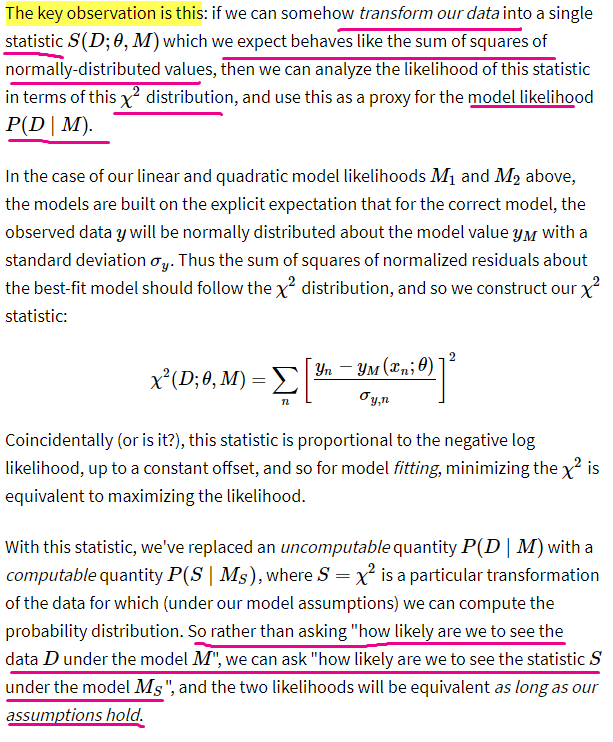

In [22]:
Image(filename="images/5_more.png")

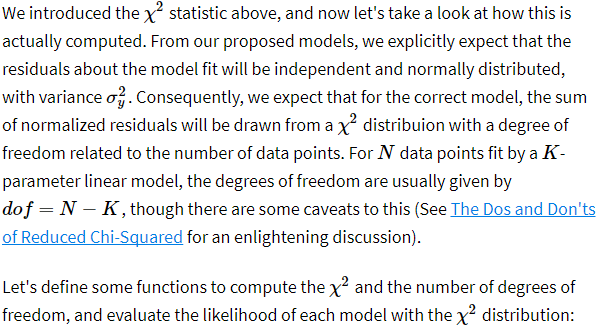

In [23]:
# FREQUENTIST MODEL SELECTION - CHI SQUARE

Image(filename="images/5_chi.png")

In [20]:
def compute_chi2(degree, data=data):
    x, y, sigma_y = data
    theta = best_theta(degree, data=data)
    resid = (y - polynomial_fit(theta, x)) / sigma_y
    return np.sum(resid ** 2)

def compute_dof(degree, data=data):
    return data.shape[1] - (degree + 1)

def chi2_likelihood(degree, data=data):
    chi2 = compute_chi2(degree, data)
    dof = compute_dof(degree, data)
    return stats.chi2(dof).pdf(chi2)

print("chi2 likelihood")
print("- linear model:    ", chi2_likelihood(1))
print("- quadratic model: ", chi2_likelihood(2))


# Observe: We have found that the likelihood of the observed residuals 
# under the linear model (M1) is slightly larger 
# than the likelihood of the observed residuals under the quadratic model (M2).

chi2 likelihood
- linear model:     0.0455244340637


- quadratic model:  0.0362561748938


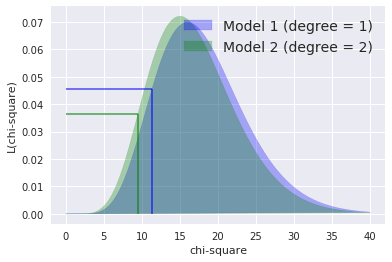

In [21]:
fig, ax = plt.subplots()
for degree, color in zip([1, 2], ['blue', 'green']):
    v = np.linspace(0, 40, 1000)
    chi2_dist = stats.chi2(compute_dof(degree)).pdf(v)
    chi2_val = compute_chi2(degree)
    chi2_like = chi2_likelihood(degree)
    ax.fill(v, chi2_dist, alpha=0.3, color=color,
            label='Model {0} (degree = {0})'.format(degree))
    ax.vlines(chi2_val, 0, chi2_like, color=color, alpha=0.6)
    ax.hlines(chi2_like, 0, chi2_val, color=color, alpha=0.6)
    ax.set(ylabel='L(chi-square)')
ax.set_xlabel('chi-square')
ax.legend(fontsize=14);

# We can see visually here how this procedure corrects for model complexity: 
# even though the χ2 value for the quadratic model is lower (shown by the 
# vertical lines), the characteristics of the χ2 distribution mean the 
# likelihood of seeing this value is lower (shown by the horizontal lines), 
# meaning that the degree=1 linear model is favored.

In [24]:
# But how much should we trust this conclusion in favor of the linear model? 
# In other words, how do we quantify the significance of this difference
#  in χ2χ2 likelihoods?


# We can make progress by realizing that in the frequentist context all data-derived 
# quantities can be considered 
# probabilistically, and this includes the difference in χ2χ2 values from two models!
#  For this particular case, the difference of χ2χ2 statistics here also follows a χ2χ2 
# distribution, with 1 degree of freedom. This is due to the fact that the models are
#  nested – that is, the linear model is a specialization of the quadratic model (for 
# some background, look up the Likelihood Ratio Test).

# We might proceed by treating the linear model as the null hypothesis, and asking if
#  there is sufficient evidence to 
# justify the more complicated quadratic model. Just as above, we can plot the χ2χ2
#  difference along with its expected distribution:

/datascience/bin/python/anaconda3/envs/bayes/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':


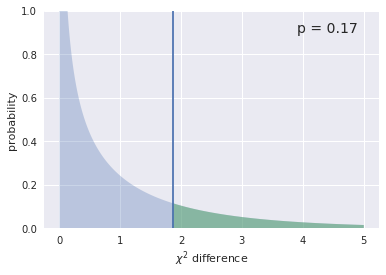

In [25]:
chi2_diff = compute_chi2(1) - compute_chi2(2)

v = np.linspace(0, 5, 1000)
chi2_dist = stats.chi2(1).pdf(v)
p_value = 1 - stats.chi2(1).cdf(chi2_diff)

fig, ax = plt.subplots()
ax.fill_between(v, 0, chi2_dist, alpha=0.3)
ax.fill_between(v, 0, chi2_dist * (v > chi2_diff), alpha=0.5)
ax.axvline(chi2_diff)
ax.set(ylim=(0, 1), xlabel="$\chi^2$ difference", ylabel="probability");
ax.text(4.9, 0.95, "p = {0:.2f}".format(p_value),
        ha='right', va='top', size=14);

In [26]:
# Here we see where this observed χ2χ2 difference lies on its expected distribution, 
# under the null hypothesis that the linear model is the true model. The area of the 
# distribution to the right of the observed value is known as the p value: for our data,
#  the pp-value is 0.17, meaning that, assuming the linear model is true, there is a 
# 17% probability that simply by chance we would see data that favors the quadratic
#  model more strongly than ours. The standard interpretation of this is to say that 
# our data are not inconsistent with the linear model: that is, our data does 
# not support the quadratic model enough to conclusively reject the simpler linear model.

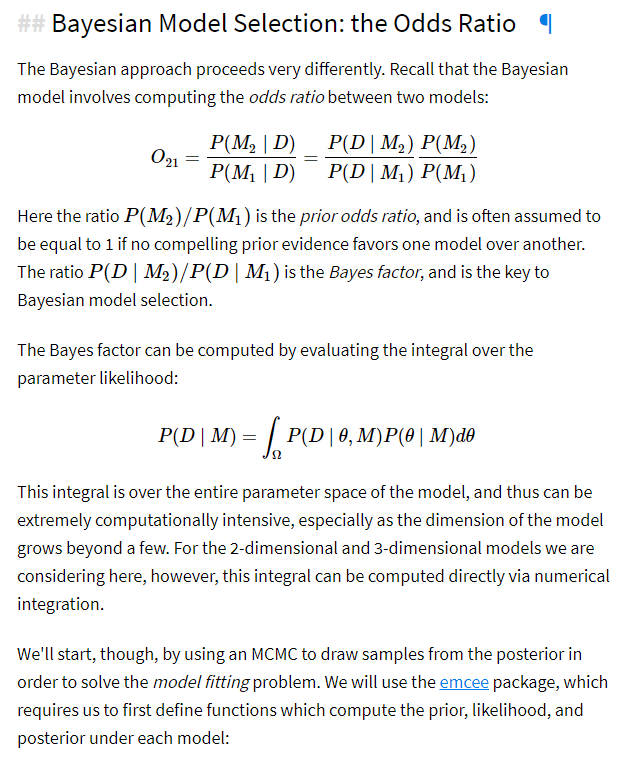

In [34]:
# BAYES MODEL SELECTION: 

Image(filename="images/5_bayesoddsratio.png")

In [27]:
def log_prior(theta):
    # size of theta determines the model.
    # flat prior over a large range
    if np.any(abs(theta) > 100):
        return -np.inf  # log(0)
    else:
        return 200 ** -len(theta)

def log_likelihood(theta, data=data):
    x, y, sigma_y = data
    yM = polynomial_fit(theta, x)
    return -0.5 * np.sum(np.log(2 * np.pi * sigma_y ** 2)
                         + (y - yM) ** 2 / sigma_y ** 2)

def log_posterior(theta, data=data):
    theta = np.asarray(theta)
    return log_prior(theta) + log_likelihood(theta, data)

In [28]:
import emcee

def compute_mcmc(degree, data=data,
                 log_posterior=log_posterior,
                 nwalkers=50, nburn=1000, nsteps=2000):
    ndim = degree + 1  # this determines the model
    rng = np.random.RandomState(0)
    starting_guesses = rng.randn(nwalkers, ndim)
    sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=[data])
    sampler.run_mcmc(starting_guesses, nsteps)
    trace = sampler.chain[:, nburn:, :].reshape(-1, ndim)
    return trace

trace_2D = compute_mcmc(1)
trace_3D = compute_mcmc(2)

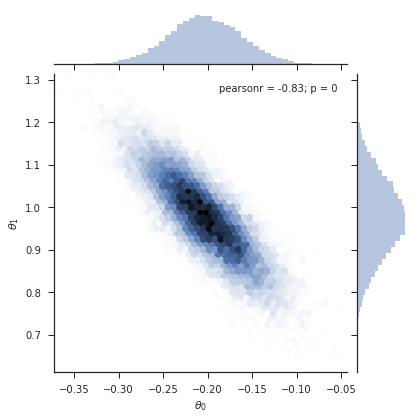

In [29]:
# The output is a trace, or a series of samples which by design 
# should reflect the posterior distribution. To visualize the posterior samples, 
# I like to use seaborn's jointplot (for 2D samples) 
# or PairGrid (for N-D samples):

import pandas as pd
columns = [r'$\theta_{0}$'.format(i) for i in range(3)]
df_2D = pd.DataFrame(trace_2D, columns=columns[:2])

with sns.axes_style('ticks'):
    jointplot = sns.jointplot(r'$\theta_0$', r'$\theta_1$',
                              data=df_2D, kind="hex");

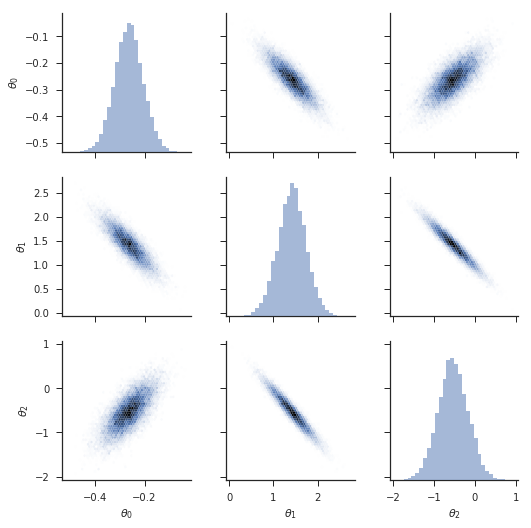

In [30]:
df_3D = pd.DataFrame(trace_3D, columns=columns[:3])

# get the colormap from the joint plot above
cmap = jointplot.ax_joint.collections[0].get_cmap()

with sns.axes_style('ticks'):
    grid = sns.PairGrid(df_3D)
    grid.map_diag(plt.hist, bins=30, alpha=0.5)
    grid.map_offdiag(plt.hexbin, gridsize=50, linewidths=0, cmap=cmap)

In [ ]:
# These samples give us a good idea of what the posterior for each model looks like, 
# but we still must integrate this posterior to find the Bayes factor.


In [32]:
# For these lower-dimensional models, we'll do direct numerical integration using 
# tools from the scipy.integrate 
# package to integrate the posterior and compute the odds ratio. The call signature 
# of the multiple integration routines is a bit confusing – I suggest referring 
# to the scipy.integrate documentation to read about the inputs.

from scipy import integrate

def integrate_posterior_2D(log_posterior, xlim, ylim, data=data):
    func = lambda theta1, theta0: np.exp(log_posterior([theta0, theta1], data))
    return integrate.dblquad(func, xlim[0], xlim[1],
                             lambda x: ylim[0], lambda x: ylim[1])

def integrate_posterior_3D(log_posterior, xlim, ylim, zlim, data=data):
    func = lambda theta2, theta1, theta0: \
        np.exp(log_posterior([theta0, theta1, theta2], data))
    return integrate.tplquad(func, xlim[0], xlim[1],
                             lambda x: ylim[0], lambda x: ylim[1],
                             lambda x, y: zlim[0], lambda x, y: zlim[1])

In [35]:
# The tricky part of the integration is choosing the integration limits
#  correctly; fortunately we can use the MCMC traces to find appropriate values. 
# We'll use IPython's %time magic to record how long each takes:

xlim, ylim = zip(trace_2D.min(0), trace_2D.max(0))
%time Z1, err_Z1 = integrate_posterior_2D(log_posterior, xlim, ylim)
print("Z1 =", Z1, "+/-", err_Z1)

CPU times: user 782 ms, sys: 35.7 ms, total: 817 ms
Wall time: 1.04 s
Z1 = 46942782.95044566 +/- 0.9597276865188178


In [39]:
xlim, ylim, zlim = zip(trace_3D.min(0), trace_3D.max(0))
%time Z2, err_Z2 = integrate_posterior_3D(log_posterior, xlim, ylim, zlim)
print("Z2 =", Z2, "+/-", err_Z2)

CPU times: user 2min 27s, sys: 2.47 s, total: 2min 29s
Wall time: 2min 47s
Z2 = 111117020.08337922 +/- 13.417535445652902


In [49]:
print("Bayes factor:", Z2 / Z1)

Bayes factor: 2.3670735542176526


In [50]:
# The Bayes factor favors the quadratic model, but only slightly (an odds 
# of about 7 to 3). In fact, this value for the Bayes factor ranks as "not 
# worth a mere mention" according to the scale proposed by Kass & Raferty 
# (1995) an influential paper on the subject.

# Notice that this interpretation is very similar to what we found with the 
# frequentist approach above, which favors the quadratic model but has too 
# large a pp-value to support discarding the simpler linear model. Indeed, 
# at the risk of causing die-hard Bayesians to cringe, you can argue roughly 
# that the equivalent "Bayesian pp-value" associated with this odds ratio is...

print('Bayesian "p-value":', Z1 / (Z1 + Z2))

# That is, the posterior probability in favor of the linear model is about 30%, 
# which is not low enough to support rejecting the simpler model. I put "pp-value" 
# here in quotes, because while a classical (frequentist) p-value reflects probability 
# conditioned on the models, this Bayesian "pp-value" reflects probability conditioned 
# on the data, and so the detailed interpretation is very different.

Bayesian "p-value": 0.2969938089850705


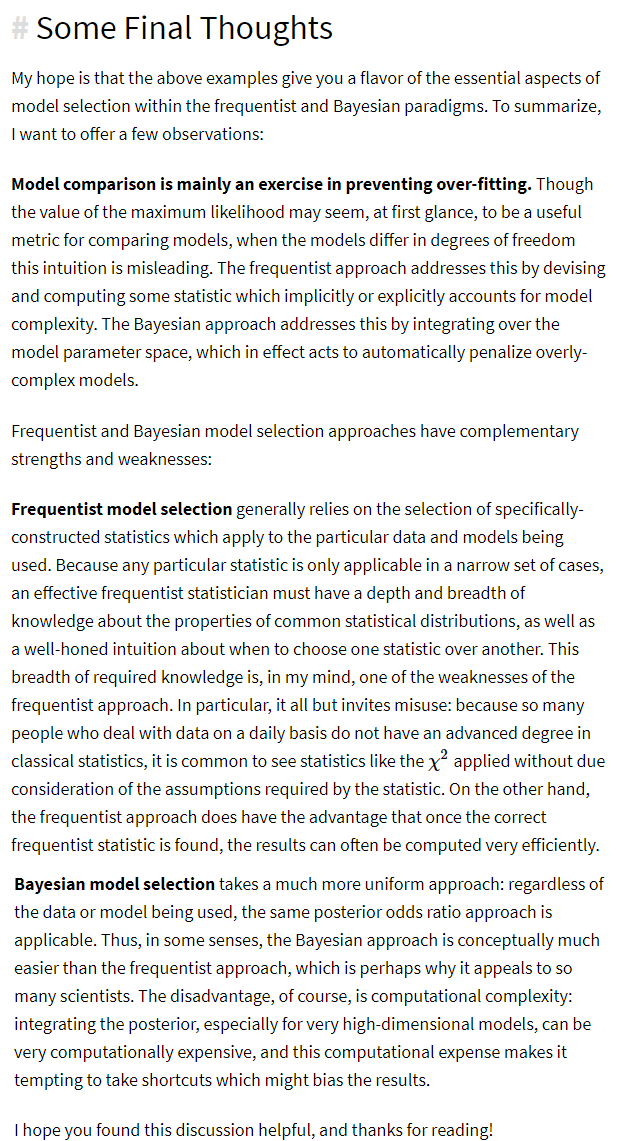

In [51]:
Image(filename="images/5_final.png")